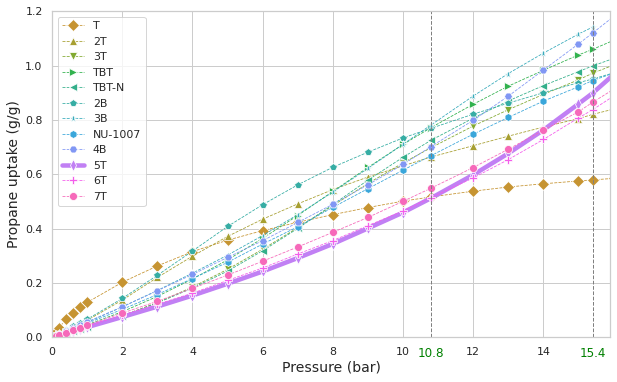

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def clean_legend_label(csv_file):
    substrings_to_remove = ['RUN', 'charges', '.', 'csv', 'Optimized', 'optimized', 'VASPcharges','VASP']
    legend_label = csv_file
    for substring in substrings_to_remove:
        legend_label = legend_label.replace(substring, '')
    return legend_label

# Update legend label replacements
def update_legend_label(label):
    replacements = {
        'TT': '2T',
        'TTT': '3T',
        'BB': '2B',
        'BBB': '3B',
        'BBBB': '4B'
    }
    return replacements.get(label, label)

# Set the directory path
directory_path = 'data_from_GCMC_at_363K'

# Check if the directory path exists
if not os.path.exists(directory_path):
    raise FileNotFoundError(f"Directory not found: {directory_path}")

# Get all CSV files starting with 'RUN' in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.startswith('RUN') and file.endswith('.csv')]

# Define the custom order for legend labels
custom_order = ['NU-1000', 'T', '2T', '3T', 'TBT', 'TBT-N', '2B', '3B', 'NU-1007', '4B', '5T', '6T', '7T']

# Sort legend labels based on the custom order
csv_files.sort(key=lambda x: custom_order.index(update_legend_label(clean_legend_label(x))) if update_legend_label(clean_legend_label(x)) in custom_order else -1)

# Set a color palette for the lines
color_palette = sns.color_palette("husl", n_colors=len(csv_files))

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a single figure for all lines
plt.figure(figsize=(10, 6))

# Define different marker styles for each line
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'd', 'P']

# Loop through each CSV file
for i, csv_file in enumerate(csv_files):
    # Create the full path to the CSV file
    file_path = os.path.join(directory_path, csv_file)

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Get the column names from the first row of the DataFrame
    x_axis_label, y_axis_label = df.columns[0], df.columns[1]

    # Clean legend label for better readability
    legend_label = clean_legend_label(csv_file)
    updated_legend_label = update_legend_label(legend_label)

    # Skip unwanted labels
    if updated_legend_label in ['8T', '10T']:
        continue

    # Set line style and width based on the legend_label
    if legend_label == '5T':
        linestyle = '-'
        linewidth = 4.5
    else:
        linestyle = '--'
        linewidth = 0.8

    # Convert values in the x-axis column from Pa to bar
    df[x_axis_label] = df[x_axis_label] / 100000  # 1 bar = 100,000 Pa

    # Convert values in the y-axis column from mg/g to g/g
    df[y_axis_label] = df[y_axis_label] / 1000  # 1 mg = 0.001 g

    # Create a line plot using Seaborn on the same figure
    sns.lineplot(data=df, x=x_axis_label, y=y_axis_label, label=updated_legend_label,
                 color=color_palette[i], marker=markers[i % len(markers)], linestyle=linestyle, linewidth=linewidth, markersize=8)

# Add vertical lines and annotations
plt.axvline(x=10.8, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=15.4, color='gray', linestyle='--', linewidth=1)

plt.xlim(left=0)
plt.xlim(right=15.9)
plt.ylim(bottom=0, top=1.2)

plt.gca().annotate('10.8', xy=(10.8, 0), xytext=(0, -10), textcoords='offset points', ha='center', 
                   va='top', fontsize=12, color='green'  )

plt.gca().annotate('15.4', xy=(15.4, 0), xytext=(0, -10), textcoords='offset points', ha='center', 
                   va='top', fontsize=12, color='green'  )

# Set plot labels and title
plt.xlabel('Pressure (bar)', fontsize=14)
plt.ylabel('Propane uptake (g/g)', fontsize=14)
plt.title(f"", fontsize=14)

# Save the plot to a file with 1200 dpi
save_path = os.path.join(directory_path, 'ALL_LINES_08.07.24.png')
plt.savefig(save_path, dpi=1200, bbox_inches='tight')

# Show the plot
plt.show()

# Close the plot to free up resources
plt.close()
